# Data Analysis with Pandas 
[link](https://www.youtube.com/watch?v=w26x-z-BdWQ&list=PLyFizHxKlcupyh5YA-3ZFKGBwjoi8zqC4&index=6)

In [161]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import Series, DataFrame
#pd.set_option('display.mpl_style', 'default') 

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [18]:
close_px = pd.read_csv('data/stock_px.csv', index_col=0, parse_dates= True)
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


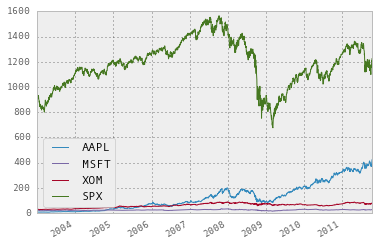

In [31]:
close_px.plot()

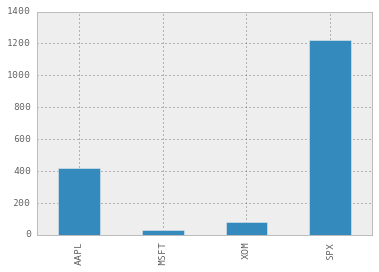

In [35]:
close_px.ix[-1].plot(kind='bar')

In [19]:
s1 = close_px['AAPL'][-20:]
s2 = close_px['AAPL'][-25:-10]
(s1+s2).head()

2011-09-12   NaN
2011-09-13   NaN
2011-09-14   NaN
2011-09-15   NaN
2011-09-16   NaN
Name: AAPL, dtype: float64

In [20]:
s1.add(s2, fill_value=0).head()

2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
Name: AAPL, dtype: float64

In [21]:
df = close_px.ix[-10:, ['AAPL', 'MSFT', 'SPX']]
df

,AAPL,MSFT,SPX
2011-10-03,374.60,24.53,1099.23
2011-10-04,372.50,25.34,1123.95
2011-10-05,378.25,25.89,1144.03
2011-10-06,377.37,26.34,1164.97
2011-10-07,369.80,26.25,1155.46
2011-10-10,388.81,26.94,1194.89
2011-10-11,400.29,27.00,1195.54
2011-10-12,402.19,26.96,1207.25
2011-10-13,408.43,27.18,1203.66
2011-10-14,422.00,27.27,1224.58


In [22]:
df.mean()

AAPL     389.424
MSFT      26.370
SPX     1171.356
dtype: float64

## apply

In [28]:
df.apply(np.mean, axis=1)
#df.mean(1)

2011-10-03    499.453333
2011-10-04    507.263333
2011-10-05    516.056667
2011-10-06    522.893333
2011-10-07    517.170000
2011-10-10    536.880000
2011-10-11    540.943333
2011-10-12    545.466667
2011-10-13    546.423333
2011-10-14    557.950000
dtype: float64

In [33]:
close_px.SPX.idxmax()

Timestamp('2007-10-09 00:00:00')

### Dates

In [11]:
df = pd.DataFrame({'a': np.random.randn(6),
                   'b': ['foo', 'bar']*3, 
                   'c': np.random.randn(6)},
                     index=pd.date_range('1/1/2000', periods=6),
                     columns = ['b', 'a', 'c', 'd'])
df

,b,a,c,d
2000-01-01,foo,-0.025291,-0.148188,NaN
2000-01-02,bar,-0.906232,0.513582,NaN
2000-01-03,foo,0.367118,-0.523249,NaN
2000-01-04,bar,-0.660170,-2.313452,NaN
2000-01-05,foo,1.204531,0.129450,NaN
2000-01-06,bar,0.284837,-1.768297,NaN


# Baby names 

In [28]:
pd.options.display.max_rows = 10
names = pd.read_csv('data/baby-names2.csv')

In [29]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [30]:
names[names.year == 1880]

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620
...,...,...,...,...,...
129995,1880,Emaline,0.000041,girl,E545
129996,1880,Ester,0.000041,girl,E236
129997,1880,Eulah,0.000041,girl,E400
129998,1880,Eulalie,0.000041,girl,E440


In [37]:
names.groupby(['year', 'sex']).size().ix[2000:2005]

year  sex 
2000  boy     1000
      girl    1000
2001  boy     1000
      girl    1000
2002  boy     1000
              ... 
2003  girl    1000
2004  boy     1000
      girl    1000
2005  boy     1000
      girl    1000
dtype: int64

In [139]:
boys = names[names.sex == 'boy']
girls = names[names.sex == 'girl']

In [50]:
def get_max_record(group):
    return group.ix[group.prop.idxmax()]

#boys[boys.year == 2000].prop.idxmax()

In [51]:
get_max_record(boys)

year           1880
name           John
prop       0.081541
sex             boy
soundex        J500
Name: 0, dtype: object

In [58]:
result =boys.groupby('year').apply(get_max_record)
result

,year,name,prop,sex,soundex
year,,,,,
1880,1880,John,0.081541,boy,J500
1881,1881,John,0.080975,boy,J500
1882,1882,John,0.078314,boy,J500
1883,1883,John,0.079066,boy,J500
1884,1884,John,0.076476,boy,J500
...,...,...,...,...,...
2004,2004,Jacob,0.013196,boy,J210
2005,2005,Jacob,0.012148,boy,J210
2006,2006,Jacob,0.011331,boy,J210


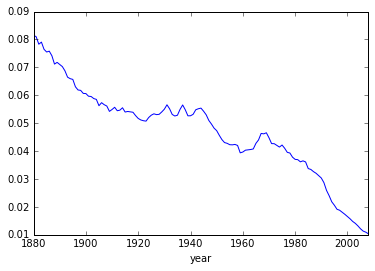

In [60]:
#proportion of names per year -> more diversity

result.prop.plot()

In [61]:
# it goes element=wise 

boys[boys.name == 'Travis']

,year,name,prop,sex,soundex
563,1880,Travis,0.000101,boy,T612
2648,1882,Travis,0.000082,boy,T612
3672,1883,Travis,0.000080,boy,T612
4656,1884,Travis,0.000081,boy,T612
5602,1885,Travis,0.000095,boy,T612
...,...,...,...,...,...
124165,2004,Travis,0.001164,boy,T612
125173,2005,Travis,0.001114,boy,T612
126162,2006,Travis,0.001186,boy,T612
127169,2007,Travis,0.001087,boy,T612


In [62]:
# so it's better to do this

idf = boys.set_index(['name', 'year'])
idf

,,prop,sex,soundex
name,year,,,
John,1880,0.081541,boy,J500
William,1880,0.080511,boy,W450
James,1880,0.050057,boy,J520
Charles,1880,0.045167,boy,C642
George,1880,0.043292,boy,G620
...,...,...,...,...
Kolten,2008,0.000090,boy,K435
Damari,2008,0.000089,boy,D560
Hugh,2008,0.000089,boy,H200


In [63]:
idf.ix['Travis']

,prop,sex,soundex
year,,,
1880,0.000101,boy,T612
1882,0.000082,boy,T612
1883,0.000080,boy,T612
1884,0.000081,boy,T612
1885,0.000095,boy,T612
...,...,...,...
2004,0.001164,boy,T612
2005,0.001114,boy,T612
2006,0.001186,boy,T612


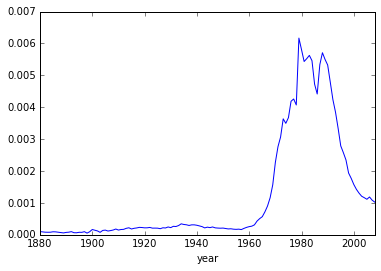

In [64]:
idf.ix['Travis'].prop.plot()

In [67]:
boys.groupby('name')['prop'].mean().sort_values()

name
Kennard     0.000027
Danniel     0.000027
Deryl       0.000028
Grayling    0.000028
Michial     0.000028
              ...   
Charles     0.019521
Robert      0.029625
William     0.034182
James       0.035465
John        0.041082
Name: prop, dtype: float64

In [75]:
result = boys.groupby('name')['prop'].describe()

In [77]:
result[:50]

name         
Aaden   count    1.000000
        mean     0.000442
        std           NaN
        min      0.000442
        25%      0.000442
                   ...   
Abbie   50%      0.000046
        75%      0.000046
        max      0.000046
Abbott  count    2.000000
        mean     0.000044
dtype: float64

In [124]:
df = boys[boys.year == 2008].sort_values(by='prop', ascending=False)

In [126]:
df.prop.cumsum()

128000    0.010355
128001    0.019792
128002    0.029093
128003    0.037892
128004    0.046594
            ...   
128995    0.795058
128996    0.795147
128997    0.795236
128998    0.795325
128999    0.795414
Name: prop, dtype: float64

In [137]:
# to get the 50%
int(df.prop.cumsum().searchsorted(0.5))

127

In [132]:
# writting the function to use in each year

def get_quantile_count(group, quantile=0.5):
    df = group.sort_values(by='prop', ascending=False)
    return int(df.prop.cumsum().searchsorted(quantile))

In [158]:
q = 0.5
boys_ct = boys.groupby('year').apply(get_quantile_count, quantile = q)
girls_ct = girls.groupby('year').apply(get_quantile_count, quantile = q)

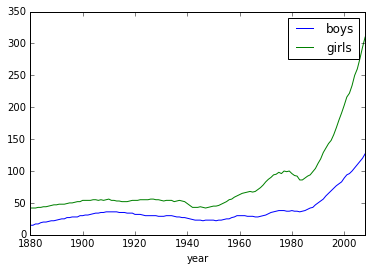

In [165]:
# people got creative choosing names in 1980's

boys_ct.plot(label= 'boys')
girls_ct.plot(label= 'girls')
plt.legend(loc= 'best')

In [167]:
grouped = boys.groupby('year')['prop']
boys['year_rank'] = grouped.transform(Series.rank)

boys

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,year,name,prop,sex,soundex,year_rank
0,1880.0,John,0.081541,boy,J500,1000.0
1,1880.0,William,0.080511,boy,W450,999.0
2,1880.0,James,0.050057,boy,J520,998.0
3,1880.0,Charles,0.045167,boy,C642,997.0
4,1880.0,George,0.043292,boy,G620,996.0
...,...,...,...,...,...,...
128996,2008.0,Damari,0.000089,boy,D560,2.5
128997,2008.0,Hugh,0.000089,boy,H200,2.5
128998,2008.0,Jensen,0.000089,boy,J525,2.5
128999,2008.0,Yurem,0.000089,boy,Y650,2.5


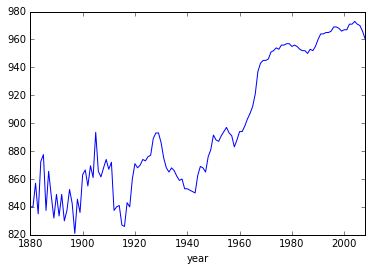

In [185]:
# rank of the names per year

idf = boys.set_index(['name', 'year'])
idf.ix['Jose'].year_rank.plot()